## <div style="text-align: center;">Complex NetworkAnalysis - Assignment 6</div>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

### 1. Create a random graph using GNM model. Vary the parameters n, and M and compute the probability of the obtained graph. 

- Plot n versus P(G) to see the trend.
- Plot M versus P(G) to see the trend.


**nCk:**
Calculates binomial coefficient using factorials. Takes two parameters, n and k, and returns the binomial coefficient. It calculates combinations, determining the number of ways to select edges in a graph, essential for probability calculations in random graph generation.

**generate_random_graph:**
Generates a random graph using networkx with specified nodes (n) and edges (m). The code generates a random graph using the G(n, m) model from networkx. It creates a graph with n nodes and m edges, Visualization is done using spring layout, and the graph is displayed.

Lastly we run a loop (3) and generate random graphs with varying node counts (n) and edge counts (M). It calculates aprobability (P(G)) for n and M and store in a list, lastly we output the trend in a graph to show the relation between n vs P(G) and M vs P(G) and output the same.

Graph 1, n=7, M=13


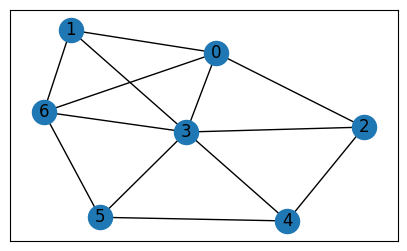

Probability P(G) : 4.914246400314512e-06 

Graph 2, n=10, M=9


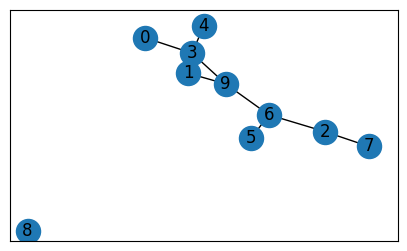

Probability P(G) : 1.1284603934692002e-09 

Graph 3, n=8, M=5


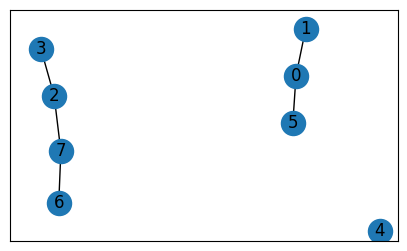

Probability P(G) : 1.0175010175010176e-05 



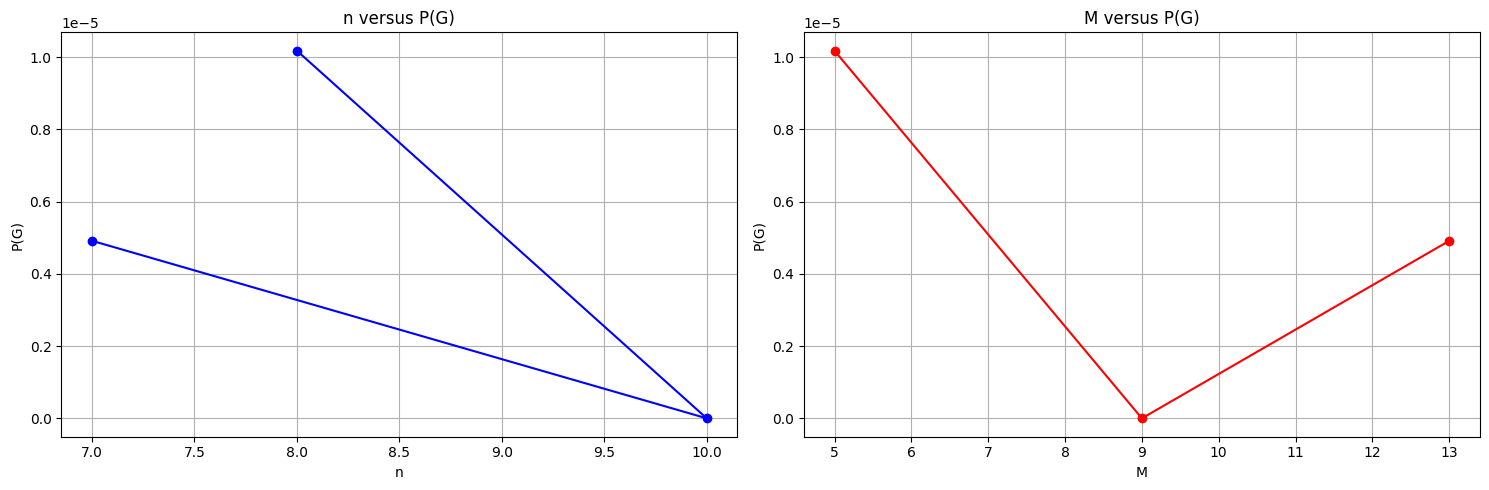

In [2]:
#helper method to calculate binomial coefficient using factorials
def nCk(n,k):
    c = math.factorial(n)//(math.factorial(k) * math.factorial(n-k))
    #print(c)
    return c

#method to geneate a rnadom graph by passing node and edges, seed = none means everytime a new random will be geenreatd
def generate_random_graph(n, m, seed=None):    
    G = nx.gnm_random_graph(n, m, seed=seed, directed=False)
    plt.figure(figsize=(5, 3))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos)  
    plt.show()
    return G


# Lists to store values of n, M and PG
n_values = []
PG_values = []
M_values = []


for i in range(1, 4):
    #geneate some random values for n and M
    n = random.randint(6, 10)
    M = random.randint(4, 14)
    
    print(f"Graph {i}, n={n}, M={M}") 
    random_graph = generate_random_graph(n, M)    
    n_edges = int((n*(n-1))/2)
    PG = 1/(nCk(n_edges,M))
    
    n_values.append(n)
    PG_values.append(PG)
    M_values.append(M)
    
    print(f"Probability P(G) : {PG} \n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot n versus P(G)
ax1.plot(n_values, PG_values, marker='o', linestyle='-', color='b')
ax1.set_title('n versus P(G)')
ax1.set_xlabel('n')
ax1.set_ylabel('P(G)')
ax1.grid(True)

# Plot M versus P(G)
ax2.plot(M_values, PG_values, marker='o', linestyle='-', color='r')
ax2.set_title('M versus P(G)')
ax2.set_xlabel('M')
ax2.set_ylabel('P(G)')
ax2.grid(True)

plt.tight_layout()
plt.show()


### 2. Draw a complex network using GNM model. Find the size of the largest connected component in the obtained network.

- Plot a graph of Number of edges versus size of largest connected component

**generate_random_graph:**
Generates a random graph using networkx with specified nodes (n) and edges (m). The code generates a random graph using the G(n, m) model from networkx. It creates a graph with n nodes and m edges, Visualization is done using spring layout, and the graph is displayed.


The code utilizes a list of tuples to define varying nodes and edges, generating random graphs for each combination. For each graph, it computes the size of the largest connected component. The resulting data is then plotted, illustrating how changes in the number of edges influence the size of the largest connected component. 

This analysis shows the structural information of random graphs, highlighting the significance of edges in deciding the connectivity and organization of networks. The visualization offers a clear understanding of the connection between edge count and the characteristics of the generated graphs, providing insights into how edges influence the connectivity and overall structure of the networks.

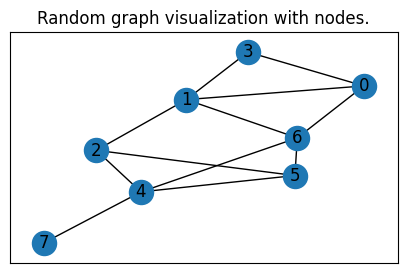

Graph 1, n=8, M=12
Max of connected component: {0, 1, 2, 3, 4, 5, 6, 7}
Size of largest connected component: 8


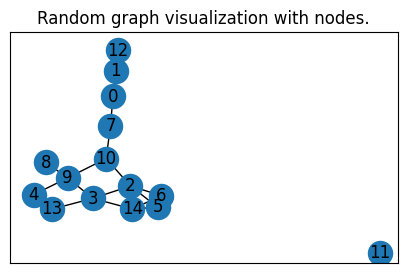

Graph 2, n=15, M=17
Max of connected component: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14}
Size of largest connected component: 14


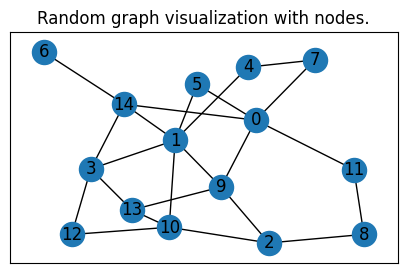

Graph 3, n=15, M=23
Max of connected component: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
Size of largest connected component: 15


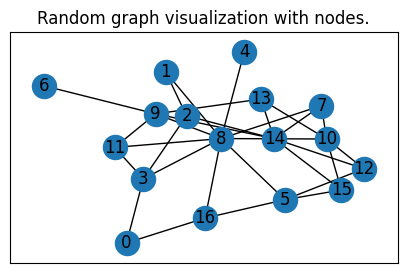

Graph 4, n=17, M=30
Max of connected component: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
Size of largest connected component: 17


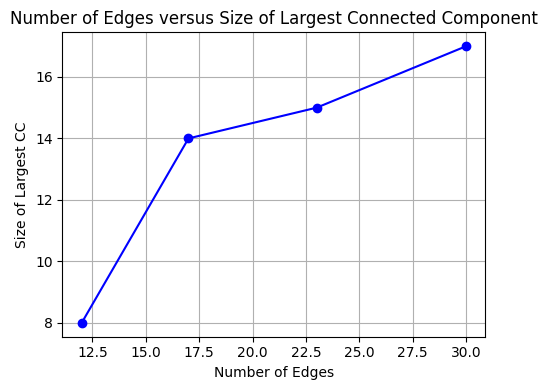

In [3]:
#method to geneate a rnadom graph by passing node and edges, seed = none means everytime a new random will be geenreatd
def generate_random_graph(n, m, seed=None):    
    G = nx.gnm_random_graph(n, m, seed=seed, directed=False)
    plt.figure(figsize=(5, 3))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos)  
    plt.title("Random graph visualization with nodes.")
    plt.show()
    return G

# list of tuple for nodes and edges
n_m_list = [(8, 12), (15, 17),(15,23),(17,30)]

# this is to hold the value for edge and largest connect for the loop we are running belowl.
edge_counts = []
largest_cc_sizes = []

for i, (n, M) in enumerate(n_m_list):
        
    G = generate_random_graph(n, M)    
    largest_cc = max(nx.connected_components(G), key=len)
    size_of_largest_cc = len(largest_cc)

    edge_counts.append(M)
    largest_cc_sizes.append(size_of_largest_cc)
    
    print(f"Graph {i+1}, n={n}, M={M}")     
    print(f"Max of connected component: {largest_cc}")
    print(f"Size of largest connected component: {size_of_largest_cc}")
    

plt.figure(figsize=(5, 4))
plt.plot(edge_counts, largest_cc_sizes, marker='o', linestyle='-', color='b')
plt.title('Number of Edges versus Size of Largest Connected Component')
plt.xlabel('Number of Edges')
plt.ylabel('Size of Largest CC')
plt.grid(True)
plt.tight_layout()
plt.show()


### 3. N firms produce goods by buying and selling intermediate products from and to each other. The resulting inter-firm transaction network is modeled as an (undirected) Erdos-Renyi random graph. Based on this model, the expected average nearest-neighbor degree is estimated as knn = 2 and the expected average clustering Coefficient = 0.01. Determine the total number N of firms and the probability p that any two firms are connected. Based on this draw a random graph with GNP model. 

The code calculates the value for **(N)** by dividing the nearest neighbor degree **(k_{nn})** by the clustering coefficient **(C)**. With **(k_{nn} = 2)** and **(C = 0.01)**, it computes **(N)** and the probability **(p)**. Using these, it generates a random graph with the GNP model, visualizing it to showcase the network structure based on the derived values for **(N)** and **(p)**.

Value for N = 200
Probability : 0.01


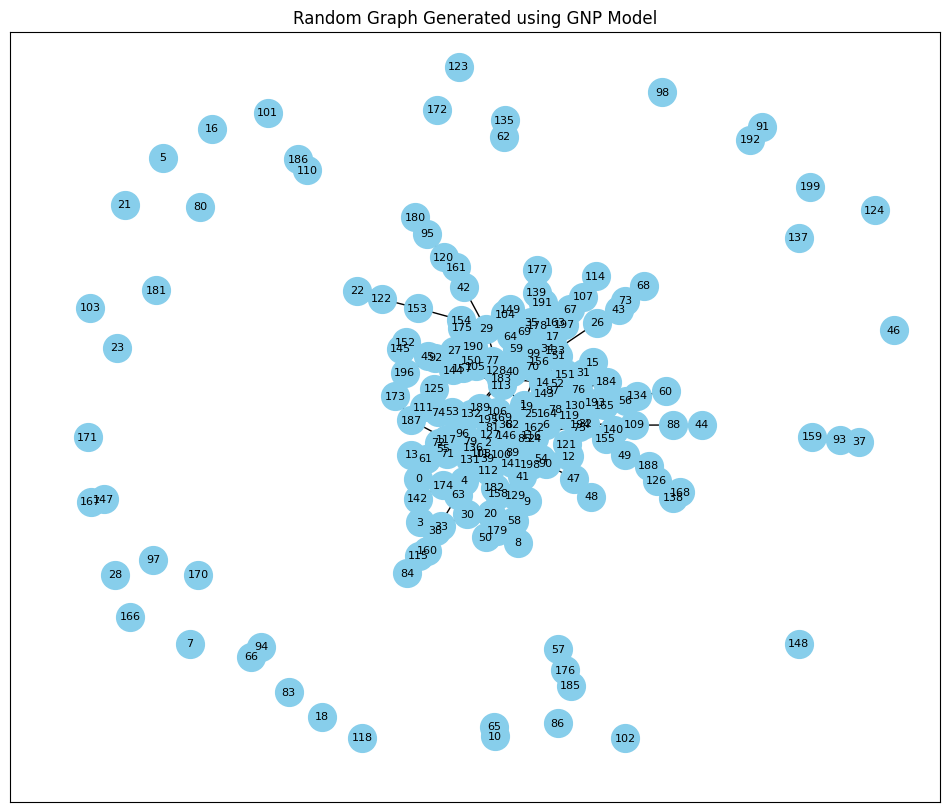

In [4]:
#first let us find the value for N, to find N we will divide the clustering coefficent i.e. C from Nearest neighbor degree Knn
knn = 2
C = 0.01

#calculate the value for N
N = int(knn/C)
print(f"Value for N = {N}")

#calculate the probability
p = C #probability is average clustering coefficient (i.e C in our example)
print(f"Probability : {p}")

#we got two information , the Node and probability, using this we will now build a random GNP model graph.

G = nx.gnp_random_graph(N, p,seed=None,directed=False) # Generate random graph using GNP model

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G,seed=42)
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=400, font_size=8, font_color='black')
plt.title('Random Graph Generated using GNP Model')
plt.show()
